<a href="https://colab.research.google.com/github/dretcm/Deep-Learning-ACM/blob/main/NN_Native.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output

from sklearn.datasets import make_circles

samples and n inputs:  (500, 2)
(500,)
(500, 1)


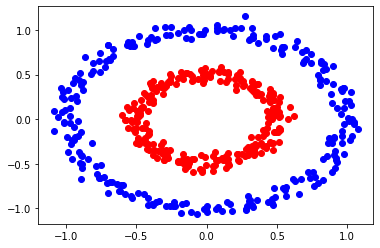

In [2]:
# creation of data set:

n_samples = 500
n_inputs = 2

X, Y = make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
print('samples and n inputs: ',X.shape)
print(Y.shape)
Y = Y[:, np.newaxis] 
print(Y.shape)

plt.scatter(X[Y[:, 0] == 0,0], X[Y[:, 0] == 0,1], c = 'blue')
plt.scatter(X[Y[:, 0] == 1,0], X[Y[:, 0] == 1,1], c = 'red')
plt.show()

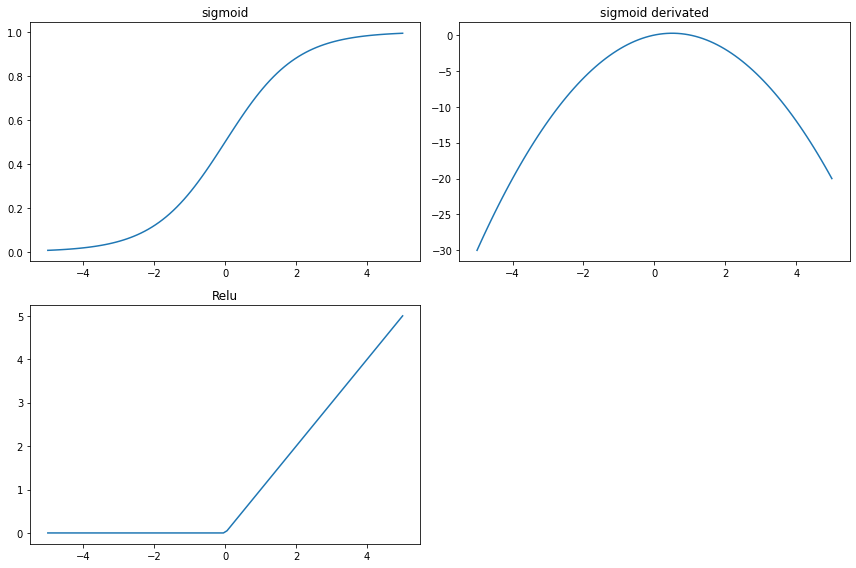

In [3]:
# function sigmoid:

sigmoid = (
          lambda x: 1 / (1 + np.e ** (-x)),  # f(x)
          lambda x: x * (1 - x)  # f^-1(x)
          )

relu = lambda x: np.maximum(x,0)

_x = np.linspace(-5, 5, 100)

plt.subplots(figsize=(12,8))

ax1 = plt.subplot(2, 2, 1)
ax1.plot(_x, sigmoid[0](_x))
ax1.set_title('sigmoid')

ax2 = plt.subplot(2, 2, 2)
ax2.plot(_x, sigmoid[1](_x))
ax2.set_title('sigmoid derivated')

ax3 = plt.subplot(2, 2, 3)
ax3.plot(_x, relu(_x))
ax3.set_title('Relu')

plt.tight_layout()
plt.show()

In [4]:
mse = (
    lambda Yp, Yr: np.mean((Yp - Yr) ** 2), # f(x)
    lambda Yp, Yr: Yp - Yr, # f^-1(x)
      )

In [5]:
class Layer:
  def __init__(self, n_inputs, n_neurons, activation_function):
    self.func = activation_function

    self.b = np.random.rand(1, n_neurons) * 2 - 1  # normalize: [0 - 1] * 2 => [0 - 2] - 1 => [-1 - 1]
    self.W = np.random.rand(n_inputs, n_neurons) * 2 - 1

In [6]:
def create_nn(topology, act_f):
  nn = []
  for i in range(len(topology)-1):
    nn.append(Layer(topology[i], topology[i+1], act_f))
  return nn

topology = [n_inputs, 4, 8, 1]
create_nn(topology, sigmoid)

In [26]:
def train(neural_net, X, Y, loss, lr, train=True):
  # forward pass
  out = [(None, X)]
  for layer in neural_net:
    z = out[-1][1].dot(layer.W) + layer.b   # out[-1][1] @ layer.W + layer.b
    a = layer.func[0](z)

    out.append((z, a))

  #print('loss: ',self.loss[0](out[-1][1], Y))

  # backpropagation:
  if train:
    delta = None
    for i in range(len(neural_net)-1,-1,-1):
      a = out[i+1][1] # f(z(x))

      if i == len(neural_net) - 1:
        delta = loss[1](a, Y) * neural_net[i].func[1](a)
      else:
        delta = delta @ _W.T * neural_net[i].func[1](a)

      _W = neural_net[i].W

      # gradient descent:
      neural_net[i].b = neural_net[i].b - np.mean(delta, axis=0, keepdims=True) * lr
      neural_net[i].W = neural_net[i].W - out[i][1].T @ delta * lr

  return out[-1][1]

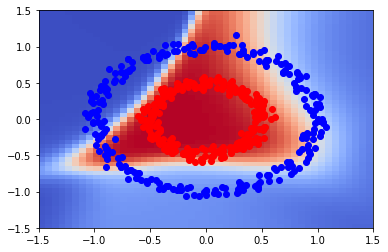

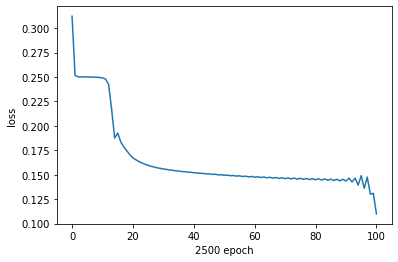

In [27]:
neural_net = create_nn(topology, sigmoid)

loss = []

for i in range(2501):
  pY = train(neural_net, X, Y, mse, 0.05)

  if i % 25 == 0:
    loss.append(mse[0](pY, Y))

    res = 50

    _x0 = np.linspace(-1.5, 1.5, res)
    _x1 = np.linspace(-1.5, 1.5, res)

    _Y = np.zeros((res,res))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _Y[i0, i1] = train(neural_net, np.array([[x0, x1]]), Y, mse, 0.05, train=False)[0][0]
        
    plt.pcolormesh(_x0, _x1, _Y, cmap='coolwarm')
    #plt.axis('equal')

    plt.scatter(X[Y[:, 0] == 0,0], X[Y[:, 0] == 0,1], c = 'blue')
    plt.scatter(X[Y[:, 0] == 1,0], X[Y[:, 0] == 1,1], c = 'red')

    clear_output(wait=True)

    plt.show()

    plt.plot(range(len(loss)), loss)
    plt.ylabel('loss')
    plt.xlabel(str(i) + ' epoch')
    plt.show()
    time.sleep(0.5)

In [37]:
class NN:
  def __init__(self, n_samples, n_neurons, activation_function):
    self.neural_net = [Layer(n_samples, n_neurons, activation_function)]
    self.compiler()

  def add_layer(self, n_samples, n_neurons, activation_function):
    self.neural_net += [Layer(n_samples, n_neurons, activation_function)]

  def compiler(self, loss=mse, lr = 0.05):
    self.loss = loss
    self.lr = lr

  def train(self, X, Y):
    # forward pass
    out = [(None, X)]
    for layer in self.neural_net:
      z = out[-1][1].dot(layer.W) + layer.b   # out[-1][1] @ layer.W + layer.b  # z = w_i + x_i
      a = layer.func[0](z) # f(z)

      out.append((z, a))

    # backpropagation:
    deltas = None
    for i in range(len(self.neural_net)-1, -1, -1):
      a = out[i+1][1] # f(z(x))

      if i == len(self.neural_net) - 1:
        delta = self.loss[1](a, Y) * self.neural_net[i].func[1](a)
      else:
        delta = delta @ _W.T * self.neural_net[i].func[1](a)

      _W = self.neural_net[i].W

      # gradient descent:
      self.neural_net[i].b = self.neural_net[i].b - np.mean(delta, axis=0, keepdims=True) * self.lr
      self.neural_net[i].W = self.neural_net[i].W - out[i][1].T @ delta * self.lr

    return out[-1][1]

  def predict(self, X):
    current = X
    for layer in self.neural_net:
      z = current.dot(layer.W) + layer.b
      current = layer.func[0](z)

    return current[0][0]

  def fit(self, X, Y, epoch=1000):
    for i in range(epoch+1):
      self.train(X, Y)
    return self.loss[0](self.train(X, Y), Y)

  def fit_visualization(self, X, Y, epoch=1000):
    loss = []
    for i in range(epoch+1):
      pY = self.train(X, Y)

      if i % 25 == 0:
        loss.append(self.loss[0](pY, Y))

        res = 50

        _x0 = np.linspace(-1.5, 1.5, res)
        _x1 = np.linspace(-1.5, 1.5, res)

        _Y = np.zeros((res,res))

        for i0, x0 in enumerate(_x0):
          for i1, x1 in enumerate(_x1):
            _Y[i0, i1] = self.predict(np.array([[x0, x1]]))
        
        plt.pcolormesh(_x0, _x1, _Y, cmap='coolwarm')
        #plt.axis('equal')

        plt.scatter(X[Y[:, 0] == 0,0], X[Y[:, 0] == 0,1], c = 'blue')
        plt.scatter(X[Y[:, 0] == 1,0], X[Y[:, 0] == 1,1], c = 'red')

        clear_output(wait=True)

        plt.show()

        plt.plot(range(len(loss)), loss)
        plt.ylabel('loss')
        plt.xlabel(str(i) + ' epoch')
        plt.show()
        time.sleep(0.5)

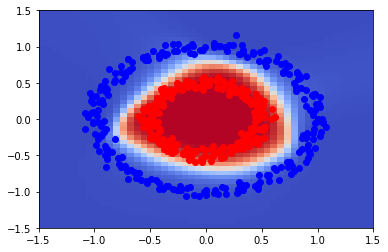

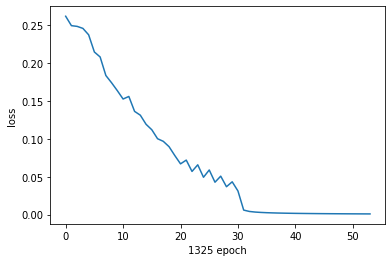

KeyboardInterrupt: ignored

In [38]:
def create_model(lr):
  model = NN(n_inputs, 4, sigmoid)
  model.add_layer(4, 8, sigmoid)
  model.add_layer(8, 1, sigmoid)
  model.compiler(loss=mse, lr=lr)
  return model

m = create_model(0.05)
m.fit_visualization(X,Y,2500)

In [39]:
learnings = np.arange(0.1,1,0.05)
losses = {}
for l in learnings:
  model = create_model(l)
  losses[l] = model.fit(X,Y, epoch=2500)

losses
#model.fit_viszualitation(X,Y, epoch=2500)

{0.1: 0.00010235322502002133,
 0.15000000000000002: 0.002247436976981045,
 0.20000000000000004: 0.12989083563438794,
 0.25000000000000006: 0.14196382681493377,
 0.30000000000000004: 0.22510405014052584,
 0.3500000000000001: 0.002424131521524177,
 0.40000000000000013: 0.49999999966628433,
 0.45000000000000007: 0.4999995082541118,
 0.5000000000000001: 0.0006530162251094782,
 0.5500000000000002: 0.49999999978333765,
 0.6000000000000002: 0.49999999999996814,
 0.6500000000000001: 0.49999999999639977,
 0.7000000000000002: 0.49999999999999917,
 0.7500000000000002: 0.49999999997526196,
 0.8000000000000002: 0.2221373424480341,
 0.8500000000000002: 0.1700921510288024,
 0.9000000000000002: 0.4999999999999336,
 0.9500000000000003: 0.4999999990820329}